
# Comparativa de modelos de la target RoundWinner



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D


## Importar librerias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

/tmp/ipython-input-4-685412595.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


## Selección de Target y predictor

In [5]:
# Definimos el target o variable objetivo
target = 'RoundWinner'

# Definimos las variables predictoras
features = [
    'RoundKills',
    'RoundDeaths',
    'KDR',
    'TeamStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'Map',
    'Team'
]

# Filtramos el DataFrame para quedarnos solo con filas donde 'RoundWinner' tenga valores válidos ('True' o 'False')
csgo = csgo[csgo['RoundWinner'].isin(['True', 'False'])]

# Creamos X con las variables predictoras y aplicamos one-hot encoding a las categóricas
X = pd.get_dummies(csgo[features], columns=['Map', 'Team'])
y = csgo['RoundWinner']

# Creamos el vector objetivo y
y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)

# Mostramos muestra para verificar
print(X.head())
print(y.head())


   RoundKills  RoundDeaths  KDR  TeamStartingEquipmentValue  \
0           0            1  0.0                        4400   
1           0            1  0.0                        4400   
2           0            1  0.0                        4400   
3           0            1  0.0                        4400   
4           0            0  0.0                        4400   

   RLethalGrenadesThrown  RNonLethalGrenadesThrown  Map_de_dust2  \
0                      0                         4         False   
1                      0                         0         False   
2                      0                         0         False   
3                      0                         0         False   
4                      1                         1         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  Team_CounterTerrorist  \
0            True          False        False                  False   
1            True          False        False                  False

/tmp/ipython-input-5-182536759.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)


## Dividiendo el csv para entrenamiento y pruebas

In [6]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)  # Necesitamos probas para ROC
}


##Evaluación de los modelos (Curva ROC)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


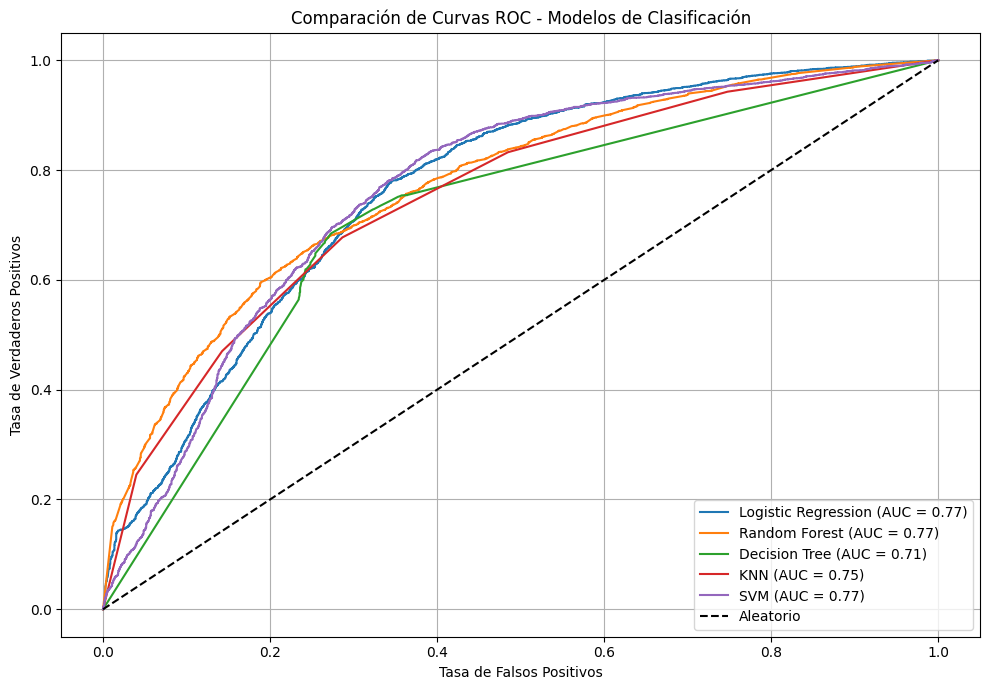

In [9]:
plt.figure(figsize=(10, 7))

for name, model in models.items():
    if name in ['SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Línea aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC - Modelos de Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## **Métricas**

### **SVM**

**Accuracy:** 0.71,
**Precision:** 0.70,
**Recall:** 0.76,
**F1 Score:** 0.73.

### **Logistic Regression**

**Accuracy:** 0.71,
**Precision:** 0.70,
**Recall:** 0.74,
**F1 Score:** 0.72.

### **Random Forest**

**Accuracy:** 0.70,
**Precision:** 0.71,
**Recall:** 0.70,
**F1 Score:** 0.70.


### **Decision Tree**

**Accuracy:** 0.71,
**Precision:** 0.72,
**Recall:** 0.68,
**F1 Score:** 0.70.

### **K-Nearest Neighbors**

**Accuracy:** 0.70
**Precision:** 0.71
**Recall:** 0.68
**F1 Score:** 0.69



SVM y Regresión Logística son las mejores opciones, con SVM liderando gracias a su mayor capacidad para captar victorias (alto recall).

Random Forest y Decision Tree son modelos estables, buenos para interpretabilidad (árbol) y robustez (ensamble).

KNN funciona bien, pero es más limitado en entornos complejos con muchas variables categóricas o numéricas con escala distinta.